In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# Função g.

Primeiro, tenho que obter a distribuição de spin similar ao modelo do Mario. Mas no modelo da Paula o parâmetro g depende da função partição magnética e de fônons. Então primeiro vou equacionar as funções partições Z_mag e Z_phonons. No artigo da Paula a definição é:

$g = \frac{Z_{HS}^{mag}}{Z_{LS}^{mag}}\times\frac{Z_{HS}^{phon}}{Z_{LS}^{phon}}$

onde 

$Z^{mag} = \frac{\sinh[(\frac{2J+1}{2J})x]}{\sinh(\frac{x}{2J})}$ e $x = \frac{g_J \mu_B J B}{k_B T}$

In [11]:
import numpy as np

# Função Partição Magnética
def Z_mag(T, g_J, J, B):
    k_B = 1.380649e-23      # J/K
    mu_B = 9.2740100783e-24 # J/T
    if J == 0:
        return np.ones_like(T)
    x = (g_J * mu_B * J * B) / (k_B * T)
    
    num = np.sinh((2 * J + 1) * x / (2 * J))
    den = np.sinh(x / (2 * J))
    
    Z = num / den
    return Z

# Função Partição dos Fônons
def Z_phon(limite_soma, T, frequencias_cm):
    k_B = 1.380649e-23   # J/K
    hbar = 1.05457168e-34  # J.s
    c = 1
    beta = 1 / (k_B * T)
    
    if len(frequencias_cm) != limite_soma:
        raise ValueError(f"O número de frequências ({len(frequencias_cm)}) não bate com o limite da soma ({limite_soma}).")
    
    prod = np.ones_like(T, dtype=float)
    
    for omega_cm in frequencias_cm:
        omega = 2 * np.pi * c * omega_cm  # Convertendo de cm^-1 para rad/s
        x = -beta * hbar * omega
        num = np.exp(x / 2)
        den = 1 - np.exp(x)
        prod *= num / den

    return prod

# Teste
Temp = np.linspace(5, 500, 1000)
#frequencias_HS = [20, 545.3, 965.2]
#frequencias_LS = [74, 545.6, 968.5]
#limite_soma = 3

frequencias_HS = np.full(15,365.31*0.69503476)
frequencias_LS = np.full(15,190*0.69503476)
limite_soma = len(frequencias_HS)

Z_mag_HS = Z_mag(Temp, 2, 2, 0.01)
Z_mag_LS = Z_mag(Temp, 2, 0, 0.01)

Z_phon_HS = Z_phon(limite_soma, Temp, frequencias_HS)
Z_phon_LS = Z_phon(limite_soma, Temp, frequencias_LS)

g = (Z_mag_HS/Z_mag_LS)*(Z_phon_HS/Z_phon_LS)

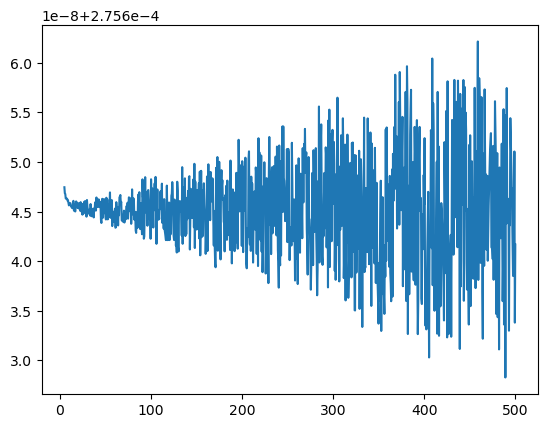

In [9]:
plt.plot(Temp,g)

In [ ]:
def n_hs():
    